CS210 Project - Yemeksepeti Orders - Selen Bozbeyli
---

In [ ]:
# libraries I used
pip install requests beautifulsoup4 selenium


Scraping Yemeksepeti orders
---
---

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
import time

driver = webdriver.Chrome(service=Service())

url = 'https://www.yemeksepeti.com/login'

driver.get(url)

time.sleep(80)  # wait for login

secondurl = 'https://www.yemeksepeti.com/new/orders'

driver.get(secondurl)

time.sleep(10)

last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # Scroll 
    driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)

    time.sleep(2)

    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

orders_container = driver.find_element(By.XPATH, '/html/body/div[1]/div[1]/div/div[2]/div[1]/div/div/div[2]')
orders = orders_container.find_elements(By.XPATH, './div')

for order in orders:
    print(order.text)  

driver.quit()

orders

import pandas as pd
df = pd.DataFrame(orders)

df


HTML to soup with Beautiful Soup & selecting orders as list
---
---

In [252]:
from bs4 import BeautifulSoup

with open('SelenYemeksepetiOrders.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

order_containers = soup.find_all('div', class_='order-item-container')



Selected HTML to Dataframe & Data Preprocessing
---
---

In [253]:
orders_data = []

for container in order_containers:
    # restaurant name
    restaurant_name = container.find('div', {'data-testid': 'order-cart__vendor-name'}).get_text(strip=True)

    # delivery info
    delivery_info = container.find('div', {'data-testid': 'past-order-subtitle'}).get_text(strip=True)
    delivery_datetime = " ".join(delivery_info.split()[:3])
    order_status = 'successful' if 'teslim edildi' in delivery_info else 'denied'

    # order info
    order_number_raw = container.find('div', {'data-testid': 'order-product__order-number'}).get_text(strip=True)
    order_number = order_number_raw.replace('Sipariş #', '').strip()

    # price 
    price_raw = container.find('div', class_='item-price').get_text(strip=True)
    price_processed = price_raw.replace('TL', '').replace('.', '').replace(',', '.').strip()
    price = float(price_processed)

    # order description
    order_description = container.find('div', {'data-testid': 'order-item-box-description'}).get_text(strip=True)

    orders_data.append({
        'Restaurant Name': restaurant_name,
        'Delivery DateTime': delivery_datetime,
        'Order Status': order_status,
        'Order Number': order_number,
        'Price': price,
        'Order Description': order_description
    })

df = pd.DataFrame(orders_data)

df

,Restaurant Name,Delivery DateTime,Order Status,Order Number,Price,Order Description
0,Little Caesars Pizza,15 Ocak 2024,successful,lx1n-l93f,218.49,1x 2 Adet Orta Boy Pizza Fırsatı
1,KFC,13 Ocak 2024,successful,gf5u-gyl7,220.00,1x 2'li Doritos Twister Menü
2,Little Caesars Pizza,12 Ocak 2024,successful,lx1n-o104,232.99,1x 2 Adet Orta Boy Pizza + İçecek (1 L.)
3,McDonald's,9 Ocak 2024,successful,rc14-2d2s,615.00,"1x Coca-Cola Fırsatı (2'li Daba Daba Burger),"
4,Burger King,9 Ocak 2023,denied,hlyb-l4n8,464.00,"1x Chicken Royale® Menü,"
5,Starbucks Coffee,3 Ocak 2024,successful,m1vy-chk2,223.99,"1x Caffè Latte,"
6,McDonald's,25 Aralık 2023,successful,rc14-kxgn,300.00,1x Coca-Cola Fırsatı (2'li Daba Daba Burger)
7,McDonald's,16 Aralık 2023,successful,ntvx-tv9g,285.00,1x Coca-Cola Fırsatı (2'li Daba Daba Burger)
8,McDonald's,7 Aralık 2023,successful,rc14-wua5,245.00,1x Yemeksepeti'ne Özel Menü (Big Mac™ & McChic...
9,Cajun Corner,6 Aralık 2023,successful,nbe6-73dr,265.00,1x Hesaplı Menü (2 Kişilik)


---
Converting months from Turkish to English then to datetime format

In [254]:
def parse_date(date_str):
    month_conversion = {
        "Ocak": "January",
        "Şubat": "February",
        "Mart": "March",
        "Nisan": "April",
        "Mayıs": "May",
        "Haziran": "June",
        "Temmuz": "July",
        "Ağustos": "August",
        "Eylül": "September",
        "Ekim": "October",
        "Kasım": "November",
        "Aralık": "December"
    }

    day, month_tr, year = date_str.split()
    month_en = month_conversion.get(month_tr, "Unknown")
    
    date_parsed = f"{day} {month_en} {year}"
    
    return pd.to_datetime(date_parsed, format='%d %B %Y', errors='coerce')

df['Delivery DateTime'] = df['Delivery DateTime'].apply(parse_date)

df['Restaurant Name'] = df['Restaurant Name'].replace('Yemeksepeti Market, Kurtköy (İstanbul)', 'Yemeksepeti Market')


In [255]:
#check parsing
df.head(10)

,Restaurant Name,Delivery DateTime,Order Status,Order Number,Price,Order Description
0,Little Caesars Pizza,2024-01-15,successful,lx1n-l93f,218.49,1x 2 Adet Orta Boy Pizza Fırsatı
1,KFC,2024-01-13,successful,gf5u-gyl7,220.00,1x 2'li Doritos Twister Menü
2,Little Caesars Pizza,2024-01-12,successful,lx1n-o104,232.99,1x 2 Adet Orta Boy Pizza + İçecek (1 L.)
3,McDonald's,2024-01-09,successful,rc14-2d2s,615.00,"1x Coca-Cola Fırsatı (2'li Daba Daba Burger),"
4,Burger King,2023-01-09,denied,hlyb-l4n8,464.00,"1x Chicken Royale® Menü,"
5,Starbucks Coffee,2024-01-03,successful,m1vy-chk2,223.99,"1x Caffè Latte,"
6,McDonald's,2023-12-25,successful,rc14-kxgn,300.00,1x Coca-Cola Fırsatı (2'li Daba Daba Burger)
7,McDonald's,2023-12-16,successful,ntvx-tv9g,285.00,1x Coca-Cola Fırsatı (2'li Daba Daba Burger)
8,McDonald's,2023-12-07,successful,rc14-wua5,245.00,1x Yemeksepeti'ne Özel Menü (Big Mac™ & McChic...
9,Cajun Corner,2023-12-06,successful,nbe6-73dr,265.00,1x Hesaplı Menü (2 Kişilik)


---
Exam Period Column

In [256]:
def is_exam_time(date):
    if (pd.Timestamp(year=date.year, month=11, day=15) <= date <= pd.Timestamp(year=date.year, month=11, day=25)) or \
       (pd.Timestamp(year=date.year, month=1, day=6) <= date <= pd.Timestamp(year=date.year, month=1, day=20)):
        return 1
    else:
        return 0

df['ExamPeriod'] = df['Delivery DateTime'].apply(is_exam_time)


In [257]:
df.head(10)

,Restaurant Name,Delivery DateTime,Order Status,Order Number,Price,Order Description,ExamPeriod
0,Little Caesars Pizza,2024-01-15,successful,lx1n-l93f,218.49,1x 2 Adet Orta Boy Pizza Fırsatı,1
1,KFC,2024-01-13,successful,gf5u-gyl7,220.00,1x 2'li Doritos Twister Menü,1
2,Little Caesars Pizza,2024-01-12,successful,lx1n-o104,232.99,1x 2 Adet Orta Boy Pizza + İçecek (1 L.),1
3,McDonald's,2024-01-09,successful,rc14-2d2s,615.00,"1x Coca-Cola Fırsatı (2'li Daba Daba Burger),",1
4,Burger King,2023-01-09,denied,hlyb-l4n8,464.00,"1x Chicken Royale® Menü,",1
5,Starbucks Coffee,2024-01-03,successful,m1vy-chk2,223.99,"1x Caffè Latte,",0
6,McDonald's,2023-12-25,successful,rc14-kxgn,300.00,1x Coca-Cola Fırsatı (2'li Daba Daba Burger),0
7,McDonald's,2023-12-16,successful,ntvx-tv9g,285.00,1x Coca-Cola Fırsatı (2'li Daba Daba Burger),0
8,McDonald's,2023-12-07,successful,rc14-wua5,245.00,1x Yemeksepeti'ne Özel Menü (Big Mac™ & McChic...,0
9,Cajun Corner,2023-12-06,successful,nbe6-73dr,265.00,1x Hesaplı Menü (2 Kişilik),0


Data Visualization
---
---

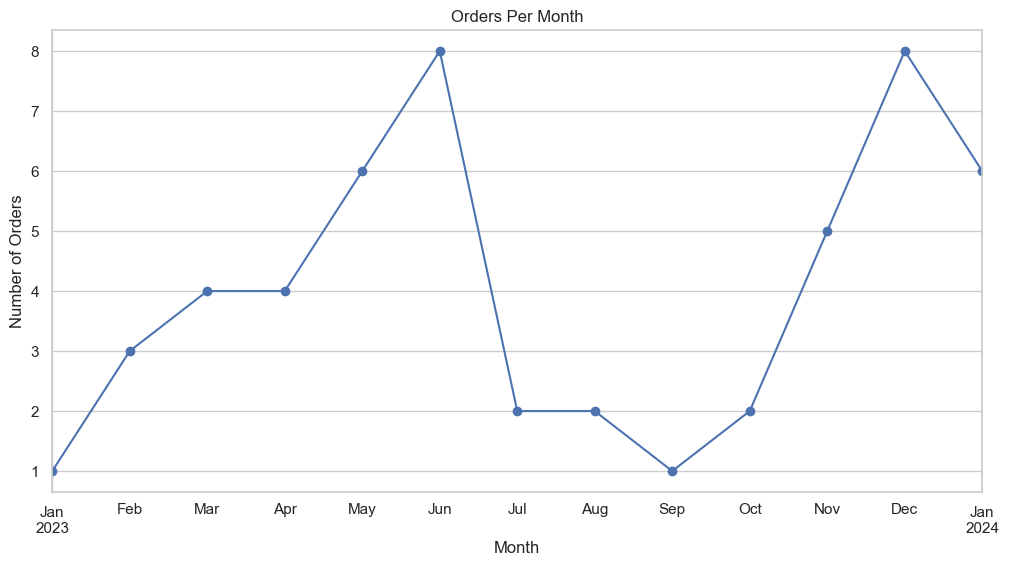

In [258]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# month and counting 
df['Month'] = df['Delivery DateTime'].dt.to_period('M')
orders_per_month = df.groupby('Month').size()

plt.figure(figsize=(12, 6))
orders_per_month.plot(kind='line', marker='o')
plt.title('Orders Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

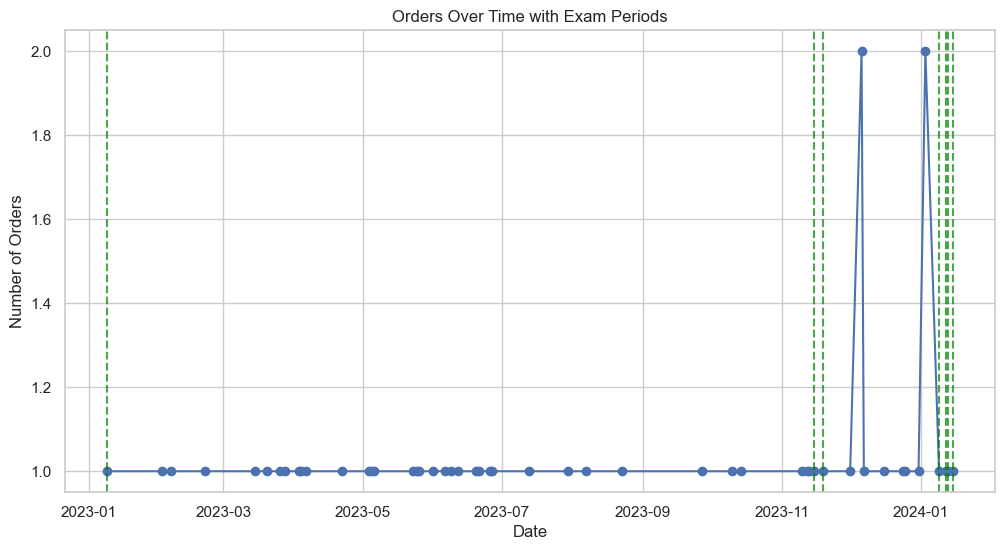

In [260]:
plt.figure(figsize=(12, 6))
orders_per_day.plot(kind='line', marker='o')

# highlight 
for date in df[df['ExamPeriod'] == 1]['Delivery DateTime']:
    plt.axvline(x=date, color='green', linestyle='--', alpha=0.7)

plt.title('Orders Over Time with Exam Periods')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

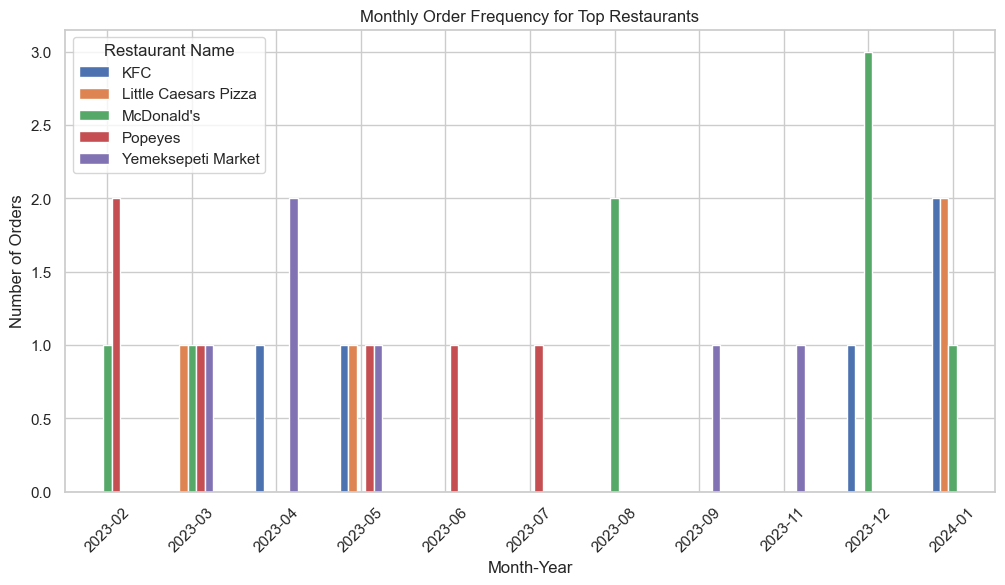

In [261]:
# top restaurants
top_restaurants = df['Restaurant Name'].value_counts().head(5).index
top_restaurants_data = df[df['Restaurant Name'].isin(top_restaurants)]

# restaurant and month
monthly_frequency = top_restaurants_data.groupby(['Restaurant Name', 'Month']).size().unstack(fill_value=0)

monthly_frequency.T.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Order Frequency for Top Restaurants')
plt.xlabel('Month-Year')
plt.ylabel('Number of Orders')
plt.legend(title='Restaurant Name')
plt.xticks(rotation=45)
plt.show()

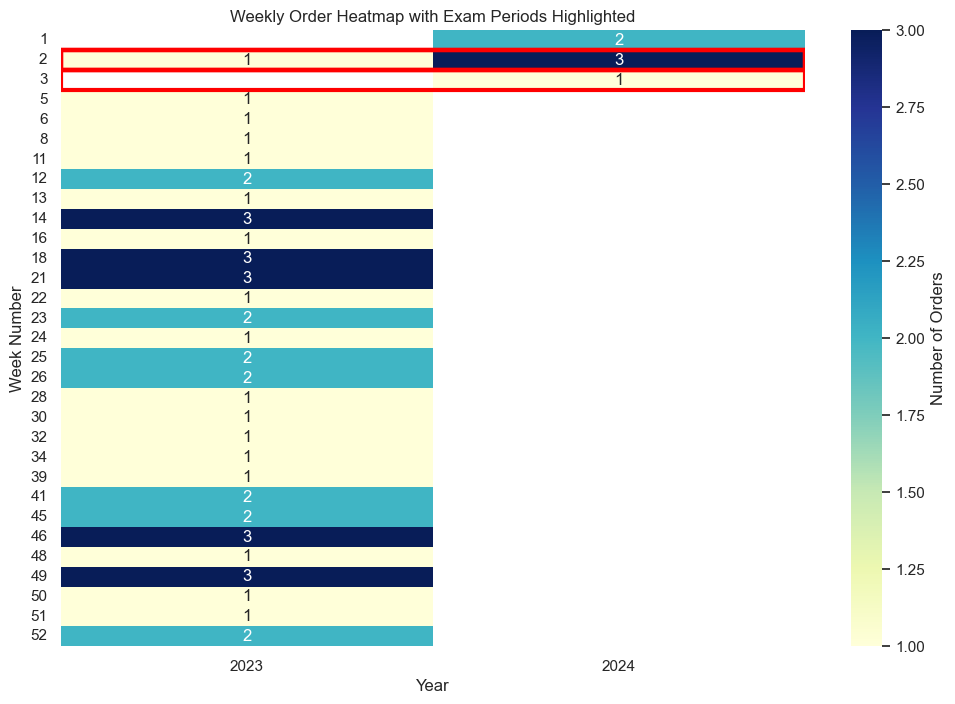

In [262]:

# week number and year
df['Week_Number'] = df['Delivery DateTime'].dt.isocalendar().week
df['Year'] = df['Delivery DateTime'].dt.year

weekly_orders = df.groupby(['Year', 'Week_Number']).size().reset_index(name='Order_Count')

pivot_table = weekly_orders.pivot("Week_Number", "Year", "Order_Count")

# heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={'label': 'Number of Orders'})

# exam weeks
for week in df[df['ExamPeriod'] == 1]['Week_Number']:
    ax.add_patch(plt.Rectangle((0, week-1), len(pivot_table.columns), 1, fill=False, edgecolor='red', lw=3))

plt.yticks(rotation=0)

plt.title('Weekly Order Heatmap with Exam Periods Highlighted')
plt.ylabel('Week Number')
plt.xlabel('Year')
plt.show()

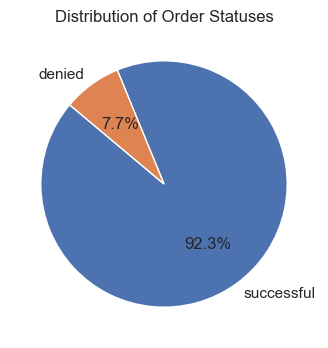

In [263]:
order_status_counts = df['Order Status'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(order_status_counts, labels=order_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Order Statuses')
plt.show()


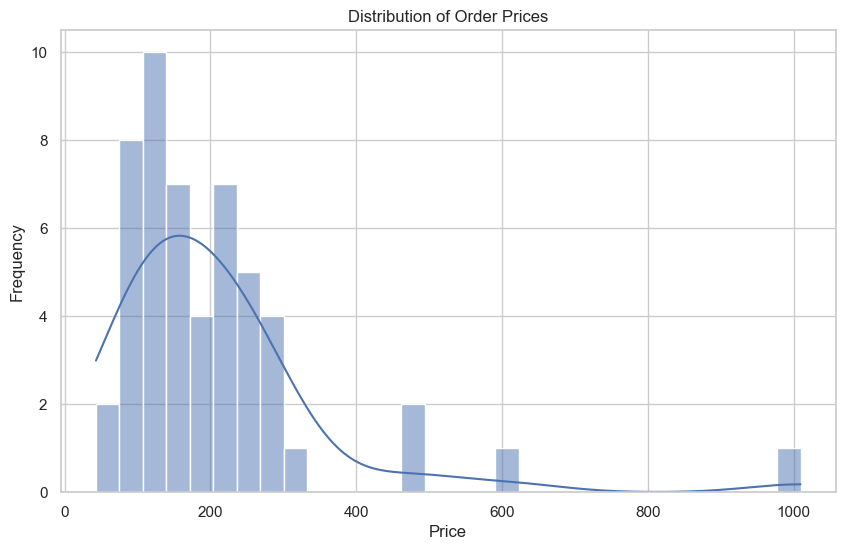

In [264]:

# distribution of order prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Order Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


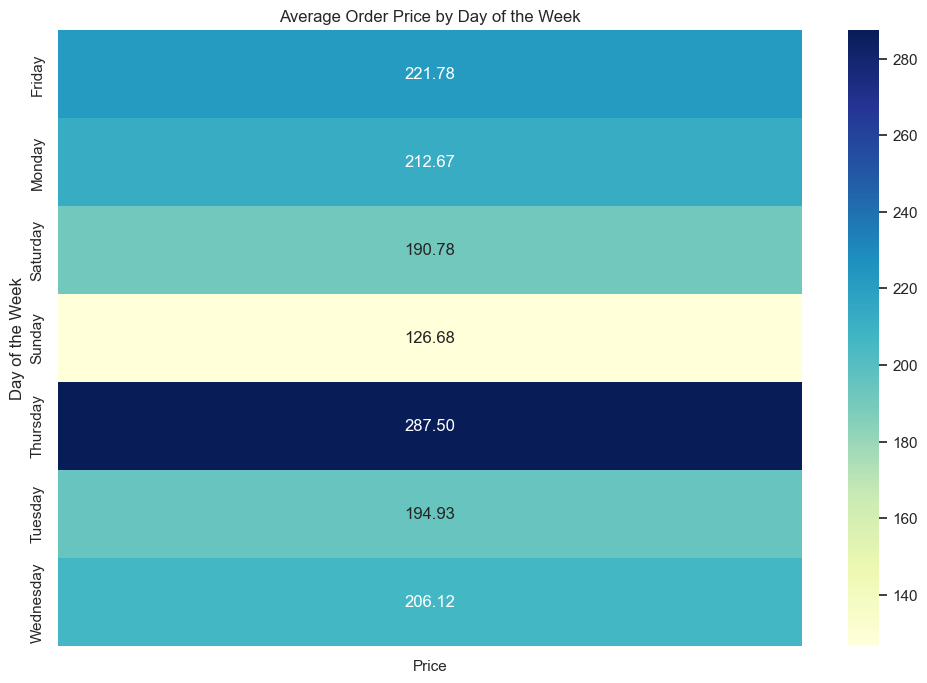

In [265]:
# day of the week
df['DayOfWeek'] = df['Delivery DateTime'].dt.day_name()

pivot_table = df.pivot_table(values='Price', index='DayOfWeek', aggfunc='mean')

# heatmap
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Average Order Price by Day of the Week')
plt.ylabel('Day of the Week')
plt.show()


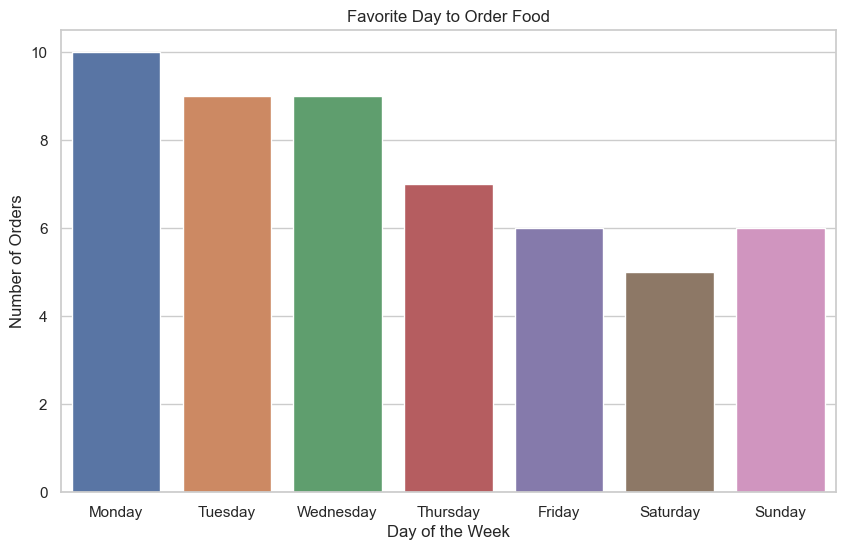

In [266]:
# counts
order_count_by_day = df['DayOfWeek'].value_counts()

order_count_by_day = order_count_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=order_count_by_day.index, y=order_count_by_day.values)
plt.title('Favorite Day to Order Food')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

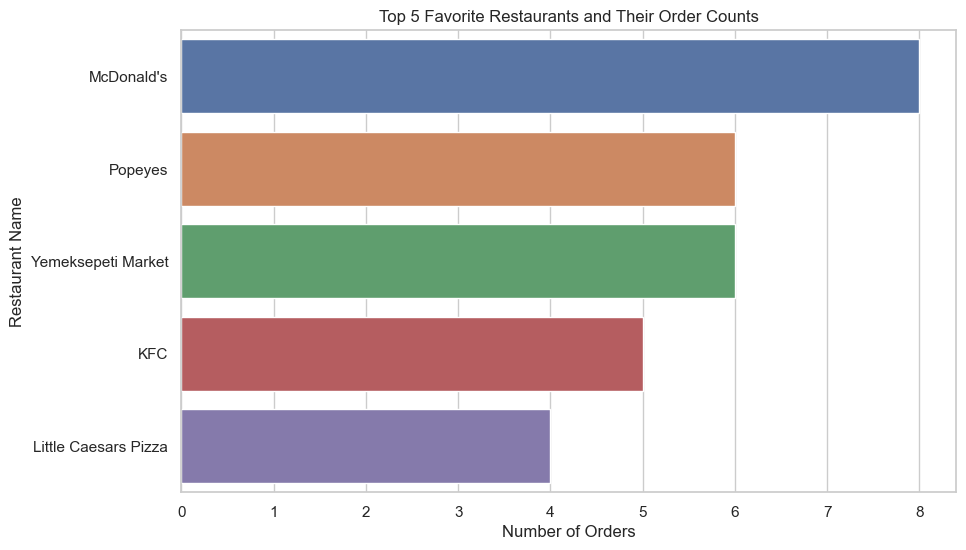

In [267]:
# number of orders for each restaurant
restaurant_order_counts = df['Restaurant Name'].value_counts()

# top 5
top_5_restaurants = restaurant_order_counts.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_restaurants.values, y=top_5_restaurants.index)
plt.title('Top 5 Favorite Restaurants and Their Order Counts')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.show()

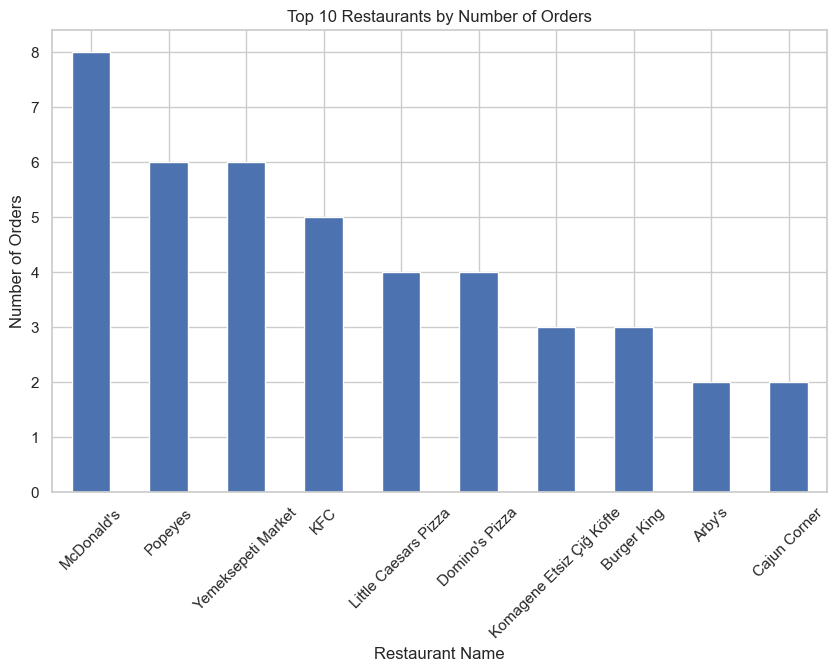

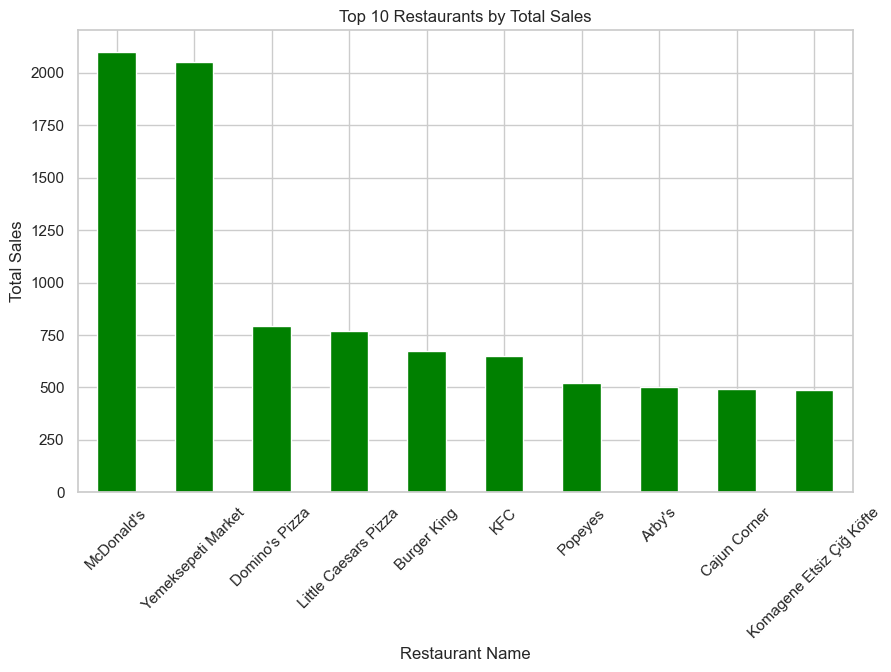

In [268]:
# restaurant_order_counts = df['Restaurant Name'].value_counts()
# already did this in upper cell

plt.figure(figsize=(10, 6))
restaurant_order_counts.head(10).plot(kind='bar')
plt.title('Top 10 Restaurants by Number of Orders')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# sales
restaurant_sales = df.groupby('Restaurant Name')['Price'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
restaurant_sales.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Restaurants by Total Sales')
plt.xlabel('Restaurant Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


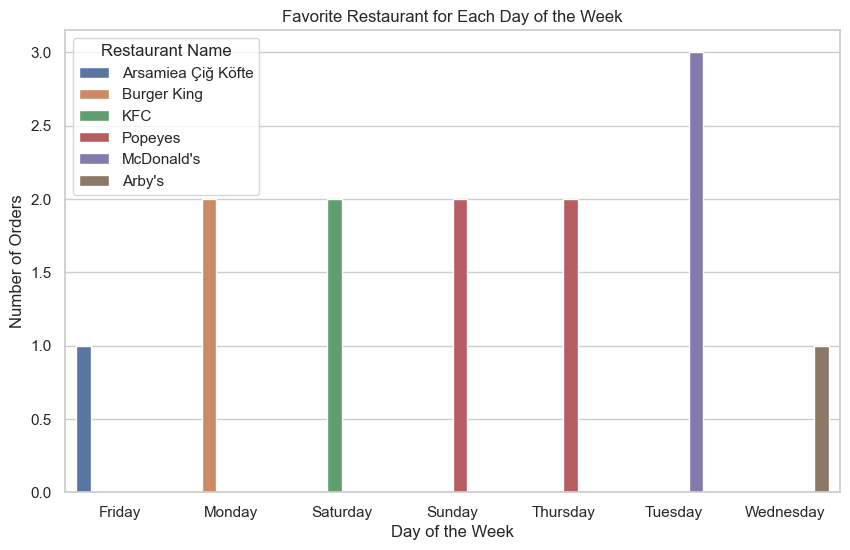

In [269]:
grouped_data = df.groupby(['DayOfWeek', 'Restaurant Name']).size().reset_index(name='OrderCount')

# most popular restaurant for each day
favorite_restaurant_per_day = grouped_data.loc[grouped_data.groupby('DayOfWeek')['OrderCount'].idxmax()]

plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='OrderCount', hue='Restaurant Name', data=favorite_restaurant_per_day)
plt.title('Favorite Restaurant for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.legend(title='Restaurant Name')
plt.show()

Machine Learning Implementation to Price Feature
---
---

In [270]:
df

,Restaurant Name,Delivery DateTime,Order Status,Order Number,Price,Order Description,ExamPeriod,Month,Week_Number,Year,DayOfWeek
0,Little Caesars Pizza,2024-01-15,successful,lx1n-l93f,218.49,1x 2 Adet Orta Boy Pizza Fırsatı,1,2024-01,3,2024,Monday
1,KFC,2024-01-13,successful,gf5u-gyl7,220.00,1x 2'li Doritos Twister Menü,1,2024-01,2,2024,Saturday
2,Little Caesars Pizza,2024-01-12,successful,lx1n-o104,232.99,1x 2 Adet Orta Boy Pizza + İçecek (1 L.),1,2024-01,2,2024,Friday
3,McDonald's,2024-01-09,successful,rc14-2d2s,615.00,"1x Coca-Cola Fırsatı (2'li Daba Daba Burger),",1,2024-01,2,2024,Tuesday
4,Burger King,2023-01-09,denied,hlyb-l4n8,464.00,"1x Chicken Royale® Menü,",1,2023-01,2,2023,Monday
5,Starbucks Coffee,2024-01-03,successful,m1vy-chk2,223.99,"1x Caffè Latte,",0,2024-01,1,2024,Wednesday
6,McDonald's,2023-12-25,successful,rc14-kxgn,300.00,1x Coca-Cola Fırsatı (2'li Daba Daba Burger),0,2023-12,52,2023,Monday
7,McDonald's,2023-12-16,successful,ntvx-tv9g,285.00,1x Coca-Cola Fırsatı (2'li Daba Daba Burger),0,2023-12,50,2023,Saturday
8,McDonald's,2023-12-07,successful,rc14-wua5,245.00,1x Yemeksepeti'ne Özel Menü (Big Mac™ & McChic...,0,2023-12,49,2023,Thursday
9,Cajun Corner,2023-12-06,successful,nbe6-73dr,265.00,1x Hesaplı Menü (2 Kişilik),0,2023-12,49,2023,Wednesday


In [271]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# preprocess
df.drop(columns=['Delivery DateTime'], inplace=True)

# features and target variable
features = ['Restaurant Name', 'DayOfWeek', 'Week_Number', 'Year', 'ExamPeriod']
target = 'Price'

# One-hot
categorical_features = ['Restaurant Name', 'DayOfWeek']
one_hot = OneHotEncoder(handle_unknown='ignore')
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder='passthrough')

# evaluating 
model_results = evaluate_models(models, X_train, y_train, X_test, y_test)
model_results

# splitting 
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# evaluate models
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        pipeline = make_pipeline(transformer, model)
        pipeline.fit(X_train, y_train)
        predictions = pipeline.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        mae = mean_absolute_error(y_test, predictions)
        results[name] = {'MSE': mse, 'MAE': mae}
    return results

model_results = evaluate_models(models, X_train, y_train, X_test, y_test)
model_results



{'Linear Regression': {'MSE': 42643.43350689114, 'MAE': 165.14883434402407},
 'Random Forest': {'MSE': 21836.296758892724, 'MAE': 104.73200000000003}}

---
Example Next Order For Price Prediction indicating last week of finals :)

In [272]:
random_forest_pipeline = make_pipeline(transformer, RandomForestRegressor(random_state=42))

random_forest_pipeline.fit(X, df[target])

next_order_features = pd.DataFrame([{
    'Restaurant Name': 'Little Caesars Pizza',  # I like pizza
    'DayOfWeek': 'Friday',  # end of the week
    'Week_Number': 4,  # week number -> last week of finals :)
    'Year': 2024,  # this year
    'ExamPeriod': 1  # yes it is still exam period :(
}])

# prediction
predicted_price = random_forest_pipeline.predict(next_order_features)
print("Predicted price for my next order: ", predicted_price[0])



Predicted price for my next order:  226.5435000000003


---
Last step, estimating my next order's price for the beginning of Spring Semester considering the interest rate of our country.

In [273]:
df_filtered = df[~df['Order Description'].str.contains('Yemeksepeti Market', na=False)]

# repeated orders
repeated_orders = df_filtered.groupby('Order Description').filter(lambda x: len(x) > 1)

repeated_orders_sorted = repeated_orders.sort_values(by=['Order Description', 'Year', 'Week_Number'])

# first and last order for getting the price change -> later we gonna use it for monthly or weekly price change based on interest rate
first_orders = repeated_orders_sorted.groupby('Order Description').first().reset_index()
last_orders = repeated_orders_sorted.groupby('Order Description').last().reset_index()

merged_orders = pd.merge(first_orders, last_orders, on='Order Description', suffixes=('_first', '_last'))

# price changes
merged_orders['Price_Change'] = merged_orders['Price_last'] - merged_orders['Price_first']

# interval as weeks
merged_orders['Time_Interval_Weeks'] = ((merged_orders['Year_last'] - merged_orders['Year_first']) * 52) + \
                                       (merged_orders['Week_Number_last'] - merged_orders['Week_Number_first'])

merged_orders[['Order Description', 'Price_first', 'Price_last', 'Price_Change', 'Time_Interval_Weeks']].head()

# probably a coupon is used so we are skipping negative price changes
merged_orders = merged_orders[merged_orders['Price_Change'] >= 0]

merged_orders['Time_Interval_Weeks'] = ((merged_orders['Year_last'] - merged_orders['Year_first']) * 52) + \
                                       (merged_orders['Week_Number_last'] - merged_orders['Week_Number_first'])

result_df = merged_orders[['Order Description', 'Price_first', 'Price_last', 'Price_Change', 'Time_Interval_Weeks']]
result_df.head()




,Order Description,Price_first,Price_last,Price_Change,Time_Interval_Weeks
0,"1x Acılı Cheese Sandviç X2,",208.0,262.0,54.0,11
1,1x Coca-Cola Fırsatı (2'li Daba Daba Burger),285.0,300.0,15.0,2
3,1x Orta Boy Pizza (1+1),154.9,163.9,9.0,7


In [278]:
# calculating next order which might be in first week of spring semester

# 1.5 month to week
additional_weeks = 6

# estimation
merged_orders['Estimated_Future_Price'] = merged_orders.apply(
    lambda row: row['Price_last'] * (1 + (row['Price_Change'] / (row['Price_first'] * row['Time_Interval_Weeks']) * additional_weeks)),
    axis=1
)

# results
print("Price Estimation for 3 repeated orders for the beginning of our Spring Semester: ")
merged_orders[['Order Description', 'Price_first', 'Price_last', 'Price_Change', 'Time_Interval_Weeks', 'Estimated_Future_Price']].head()



Price Estimation for 3 repeated orders for the beginning of our Spring Semester: 


,Order Description,Price_first,Price_last,Price_Change,Time_Interval_Weeks,Estimated_Future_Price
0,"1x Acılı Cheese Sandviç X2,",208.0,262.0,54.0,11,299.101399
1,1x Coca-Cola Fırsatı (2'li Daba Daba Burger),285.0,300.0,15.0,2,347.368421
3,1x Orta Boy Pizza (1+1),154.9,163.9,9.0,7,172.062501
